# Pima Indians Diabetes dataset
![](https://ankhoudary12.github.io/assets/diabetes_images/pima.jpeg)

The features (attributes) of the dataset:
*   Pregnancies (preg) : number of times pregnant
* Glucose (Plas): concentration of glucose in blood 2 hrs after ingestion of sugary drink (mmol/L)
*   Blood Pressure (pres): diastolic blood pressure (mm Hg)
*   Skin Thickness (skin): triceps skin fold thickness (mm)
*   Insulin (insu): concentration of insulin in blood 2 hrs after ingestion of sugary drink (μU/mL)
*   BMI (mass): body mass index (weight in kg/(height in m)^2)
*   Diabetes Pedigree Function (Predi): 0:1 value generated from familial diabetes history/risk
*   Age: age of patient

The output of the dataset:
* Label: 0 (no diabetes)  and 1 (Type II diabetes)


## อ่านไฟล์ pima_diab.csv จากนั้นแสดง 5 records แรกของชุดข้อมูล
** ให้นักศึกษาโหลดไฟล์ชุดข้อมูล pima diabete จาก google classroom

In [89]:
import pandas as pd
df = pd.read_csv('pima_diabelete.csv')
df.head(5)

,Unnamed: 0,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,tested_positive
1,1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,tested_negative
2,2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,tested_positive
3,3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,tested_negative
4,4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,tested_positive


## Data Preprocessing
1. ลบคอลัมน์ 'Unnamed: 0'
2. แทนค่า tested_negative ด้วย 0 และ tested_positive ด้วย 1 ในคอลัมน์ class
3. เติม missing values ด้วยค่าเฉลี่ยในแต่ละคอลัมน์
4. แสดงผลลัพธ์ dataframe


In [90]:
df = df.drop(["Unnamed: 0"],axis=1)
df['class'] = df['class'].replace({"tested_positive":1,"tested_negative":0})
df = df.fillna(df.mean())
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


## Feature Selection
คำนวณ feature correlation เพื่อเลือก 4 features ที่มีค่า correlation กับ class สูงสุด พร้อมนำมาสร้าง dataframe ใหม่ร่วมกับ class labels   

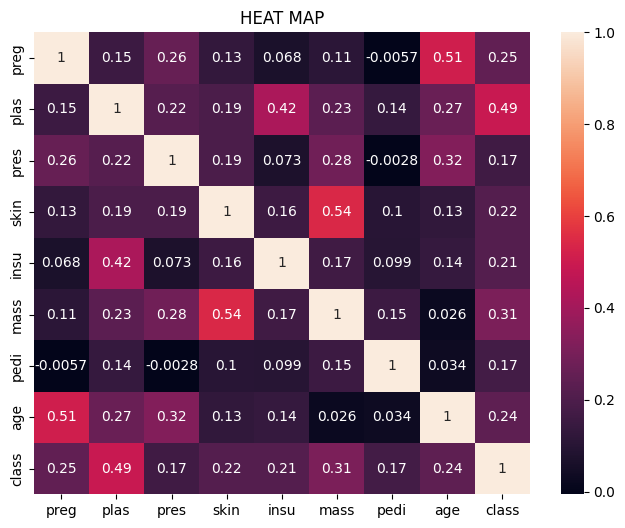

,class,plas,mass,preg,age
0,1,148.0,33.6,6.000000,50
1,0,85.0,26.6,1.000000,31
2,1,183.0,23.3,8.000000,32
3,0,89.0,28.1,1.000000,21
4,1,137.0,43.1,4.494673,33
...,...,...,...,...,...
763,0,101.0,32.9,10.000000,63
764,0,122.0,36.8,2.000000,27
765,0,121.0,26.2,5.000000,30
766,1,126.0,30.1,1.000000,47


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
cor = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot = True)
plt.title('HEAT MAP')
plt.show()
cor_target = cor['class']
relevant_features = cor_target[cor_target <= 1]
relevant_features = relevant_features.sort_values(ascending=False)
top_features = relevant_features.sort_values(ascending=False)[0:5].index
# relevant_features = relevant_features.head(4)
# relevant_features
newdf = df[['plas','mass','preg','age','class']]
newdf = newdf[top_features]
newdf

แบ่ง dataframe เป็น 70% สำหรับ training และ 30% สำหรับ test
พร้อมแสดงมิติของ X_train และ X_test

In [106]:
from sklearn.model_selection import train_test_split
# temp = wrongdf.drop(["class"],axis=1)
X = newdf.drop(["class"],axis=1)
Y = newdf['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, X_test.shape)

(537, 4) (231, 4)


สร้างโมเดล knn โดยกำหนด k = 5 จากนั้นแสดงความแม่นยำบน test dataset

In [107]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print('The accuracy of centroid-based model : {:.2f}%'.format(result*100))

The accuracy of centroid-based model : 74.46%


ทดลองทำนาย label ของ sample ลำดับที่ 3 ของ test set

In [ ]:
test_data = X_test[2:3] #เอา 2<3 เอา 2 1:3 1<3 เอา 1 2
                            ## pick up the 3rd sample in X_test
print('the feature vector of the 2nd sample : ', test_data)
label = model.predict(test_data)                 ## predict label for the 2nd sample in X_test
print('the predicted label {}'.format(label))

the feature vector of the 2nd sample :       plas  mass  preg  age
488  99.0  25.6   4.0   28
the predicted label [0]


ใช้ GridSearchCV เพื่อหาค่า k โดยเริ่มจาก k=1 ถึง k=20 จากนั้นแสดงผลลัพธ์ค่า k

In [ ]:
from sklearn.model_selection import GridSearchCV       ## search best parameters
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':list(range(1,21))}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
best_k = clf.best_params_['n_neighbors']
best_k

9

ใช้ค่า k ที่หาได้สร้างโมเดล knn พร้อมแสดงค่าความแม่นยำบน test dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print('The accuracy of centroid-based model : {:.2f}%'.format(result*100)) # compute accuracy on the test dataset

The accuracy of centroid-based model : 77.49%


บันทึกโมเดล knn ด้วย pickle โดยตั้งชื่อ 'knn_best_model.csv'

In [ ]:
import pickle
filename = 'knn_best_model.csv'
pickle.dump(model, open(filename, 'wb'))

โหลดไฟล์ pickle พร้อมแสดงค่าความแม่นยำของโมเดลบน test dataset

In [ ]:
import pickle
filename = 'knn_best_model.csv'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print('The accuracy of centroid-based model : {:.2f}%'.format(result*100))

The accuracy of centroid-based model : 77.49%


## Face Recognition task
The dataset contains 40 faces of 400 images.
![](https://www.kaggleusercontent.com/kf/19627012/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..4tPGNC3rrKy07hfHGaZtfQ.bGAzPNw0GEcTvpdvP1IFukNwRp0_Av0GH0lyg6j6uQ63Im4K8V_LaIoStrJ8HXJaiQ3pTK6F62VSl7VlWlE-WlhFHeFt3xa8E-XkZiPbv2vPM6PI-zUHf_vutJuuhDlXviXUAhguSuGTOEwfGC3uF9wiHFLS0UEJaRElFMesKBRptAEuQYFWSmh1lDpDYbJR9oHseND76mzDwweEdO2LxeKsC9I1lwMPt8Sspc4wcnXPOcXRGB0LmBU-9fPLeiQU7uNJYt0vYE_AeCvqEEIO_wXwnsz9qItgLvHKBzkoryxROegu-yQrL7iFrIKxjcAqEtRFaS_lQdY_rC9N9eG_nmwKqa1AGOMgVpvlQJu8EOA14TSXAqrsgpm-oJ3O1FhAvlYlMMvos7Jv3M0fnWTKSyMctTA5MvKmkpjKkonZMCCg-Q7vanMzRWzl2JlJBBK4exQ0X6z70hyPTxRBTj7KksCoq2vOpaFYMTSCIDjlbMN8q1vZFwMQMlfBAX9zN5vHCg-dhG5IQqTUFfblVIbfHvMsyYiA_zCdbvt01CSIpdKGT8zxPjKanFEzpURu2BTv9mDCMZ3ovmWTuSFFAB7dCBaoD_51AzTkdvCVvCYaopq7EGyU2kPGIDrxpi9rgvVkcx96xnjZPEO4CcS85QR8CCOO7NnMcadSRYHdJ6PpZ_4.H1ikrTdZcLZR3-LZQwYpzw/__results___files/__results___12_0.png)

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
X = faces.images
Y = faces.target
print(X.shape, Y.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 64, 64) (400,)


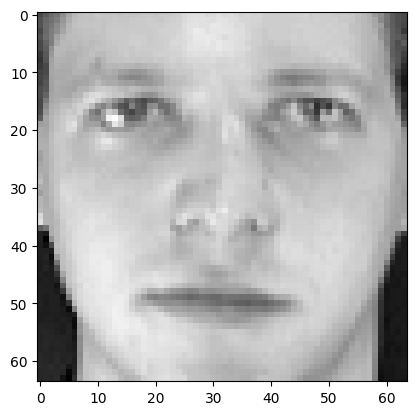

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0], cmap='gray')
plt.show()

แบ่ง dataset 80% สำหรับ training และ 20% สำหรับ test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)
print(X_train.shape, X_test.shape)

(320, 4096) (80, 4096)


สร้างโมเดล centroid พร้อมแสดงความแม่นยำบน test dataset

In [ ]:
from sklearn.neighbors import NearestCentroid
model = NearestCentroid()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print('The accuracy of centroid-based model : {:.2f}%'.format(result*100))

The accuracy of centroid-based model : 83.75%


บันทึกโมเดลในรูปของไฟล์ pickle

In [ ]:
import pickle
filename = 'face.csv'
pickle.dump(model, open(filename, 'wb'))

โหลดโมเดลจากไฟล์ pickle จากนั้นทำการเลือก 20 samples แรก ของ test dataset พร้อมแสดงผลลัพธ์การทำนาย label ของโมเดลในแต่ละ sample เปรียบเทียบกับ acutal label

In [ ]:
import pickle
filename = 'face.csv'
loaded_model = pickle.load(open(filename, 'rb'))
test_data = X_test[0:20]
label = loaded_model.predict(test_data)
print(label)
print(y_test[0:20])

[13 19  4 10 25 36 31 39 29  6 24  2 27  3 33  1 20 20  6  8]
[13 19  4 10 25 36 31 39 29  6 24  2 27 12 33  1 34 20  6  8]
